In [1]:
import pandas as pd
import numpy as np
import optuna
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve

# **WINE DATASET**

In [2]:
from sklearn.datasets import load_wine

wine = load_wine()

In [3]:
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['target'] = df['target'].apply(lambda x: wine.target_names[x])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [4]:
X = df.drop('target', axis=1)
y = df['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [8]:
classifier = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


Confusion Matrix
[[ 9  0  0]
 [ 0 11  0]
 [ 0  0  7]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         9
     class_1       1.00      1.00      1.00        11
     class_2       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



[I 2025-08-26 05:54:56,340] A new study created in memory with name: no-name-b3dec3ab-6dee-44ee-af19-dca79edb16f2
[I 2025-08-26 05:54:56,712] Trial 0 finished with value: 0.9629629629629629 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.005028217198929695, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.9629629629629629.
[I 2025-08-26 05:54:57,672] Trial 1 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008490330246413668, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 1.0.
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-08-26 05:54:58,307] Trial 2 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic',


Best Trial:
{'hidden_layer_sizes': (300,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0008490330246413668, 'learning_rate': 'adaptive'}

Confusion Matrix
[[ 9  0  0]
 [ 0 11  0]
 [ 0  0  7]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         9
     class_1       1.00      1.00      1.00        11
     class_2       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



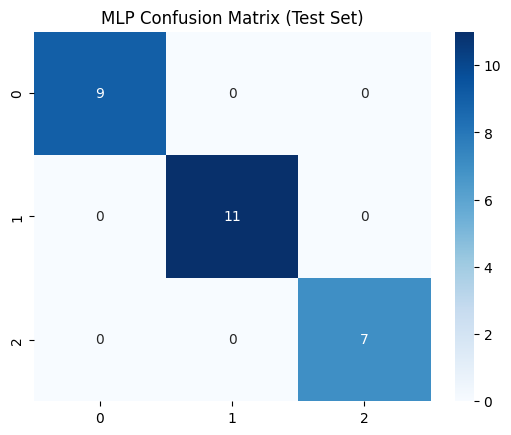

In [7]:
warnings.filterwarnings("ignore", category=UserWarning, module="optuna")

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

def objective(trial):
    
    hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(100,), (200,), (300,), (100,100), (200,100)])
    activation = trial.suggest_categorical("activation", ["relu", "tanh", "logistic"])
    solver = trial.suggest_categorical("solver", ["adam", "sgd", "lbfgs"])
    alpha = alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
    learning_rate = trial.suggest_categorical("learning_rate", ["constant", "adaptive", "invscaling"])

    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=1000,
        random_state=42
    )

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)

    return accuracy_score(y_val, y_pred)


# Run Optuna search
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)  

print("\nBest Trial:")
print(study.best_trial.params)

# Train best model
best_params = study.best_trial.params
best_clf = MLPClassifier(**best_params, max_iter=1000, random_state=42)
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("MLP Confusion Matrix (Test Set)")
plt.show()

[I 2025-08-25 16:07:51,195] A new study created in memory with name: no-name-9194deb3-63c7-4a12-a553-a54122e46d9a



=== Train-Test Split: 50:50 ===


[I 2025-08-25 16:07:51,888] Trial 0 finished with value: 0.25 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 1.802402770123608e-05, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.25.
[I 2025-08-25 16:07:52,598] Trial 1 finished with value: 0.25 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 1.020010677611851e-05, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.25.
[I 2025-08-25 16:07:52,651] Trial 2 finished with value: 0.9545454545454546 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 9.32621664918402e-05, 'learning_rate': 'constant'}. Best is trial 2 with value: 0.9545454545454546.
[I 2025-08-25 16:07:52,973] Trial 3 finished with value: 0.2727272727272727 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 3.669345029304496e-05, 'learning_rate': 'invscaling'}. Best 


Best Trial:
{'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'sgd', 'alpha': 1.727206677169179e-05, 'learning_rate': 'constant'}
              precision    recall  f1-score   support

     class_0       0.94      1.00      0.97        15
     class_1       1.00      0.89      0.94        18
     class_2       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



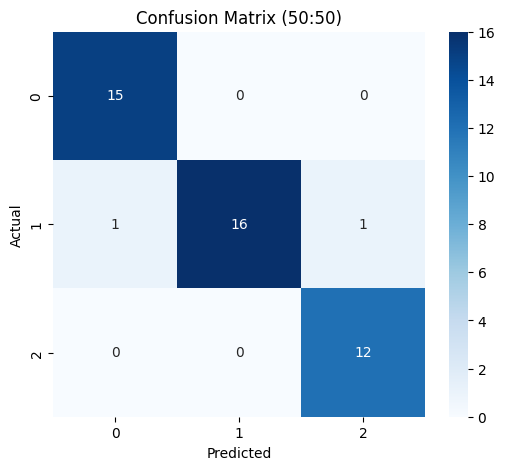

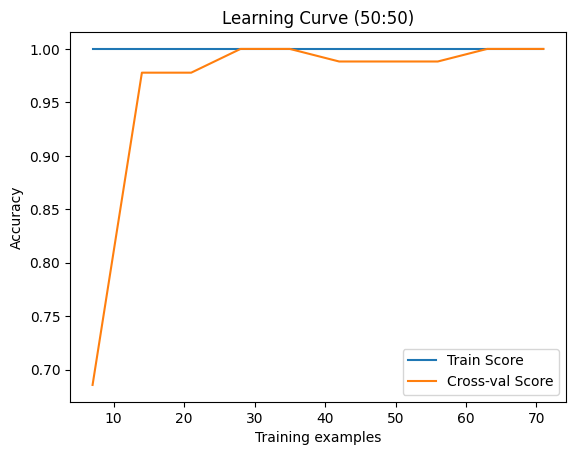

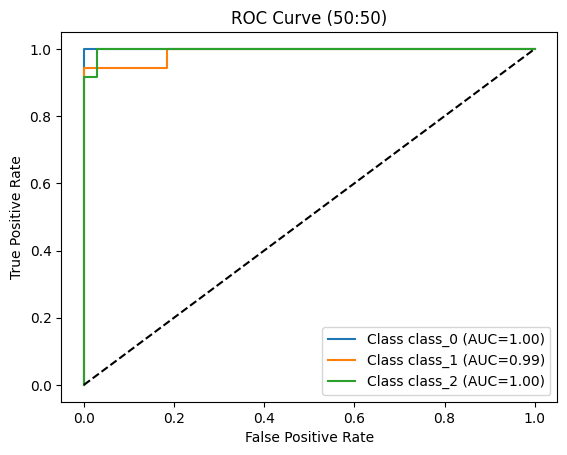

[I 2025-08-25 16:08:28,309] A new study created in memory with name: no-name-c36524ad-c3dc-437b-8b57-7413b8dbfea7



=== Train-Test Split: 60:40 ===


[I 2025-08-25 16:08:28,611] Trial 0 finished with value: 0.6944444444444444 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.005928721718308314, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.6944444444444444.
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-08-25 16:08:29,608] Trial 1 finished with value: 0.7222222222222222 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 1.3977840749555928e-05, 'learning_rate': 'invscaling'}. Best is trial 1 with value: 0.7222222222222222.
[I 2025-08-25 16:08:29,799] Trial 2 finished with value: 0.9722222222222222 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.00024425515545139267, 'learning_rate': '


Best Trial:
{'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 2.385282645018547e-05, 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

     class_0       0.92      1.00      0.96        12
     class_1       1.00      0.93      0.97        15
     class_2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



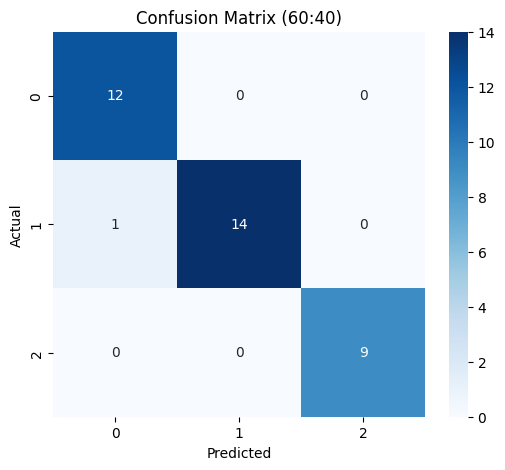

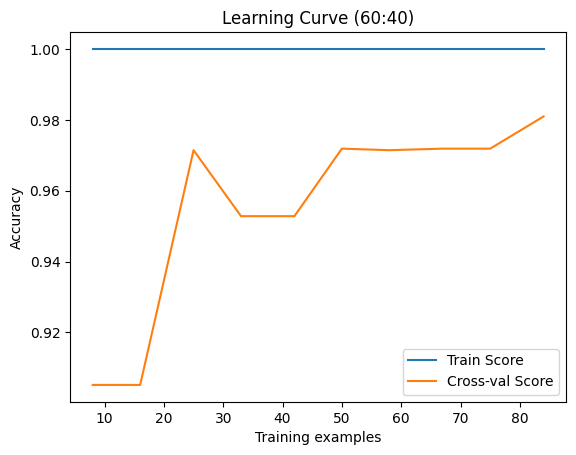

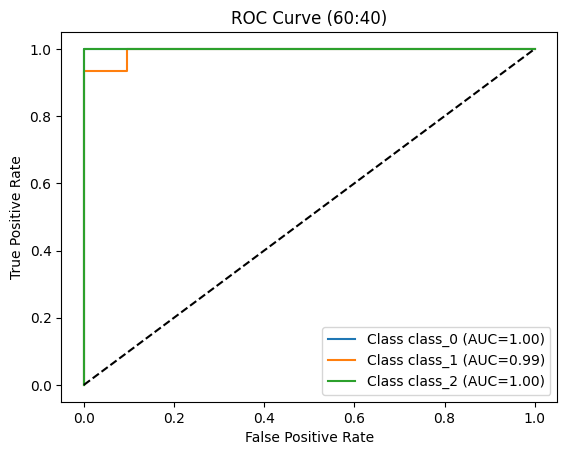

[I 2025-08-25 16:08:41,178] A new study created in memory with name: no-name-65a67e1c-b544-4182-bb30-20f7f47090b3



=== Train-Test Split: 70:30 ===


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-08-25 16:08:42,271] Trial 0 finished with value: 0.5185185185185185 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.006046331076500494, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.5185185185185185.
[I 2025-08-25 16:08:42,719] Trial 1 finished with value: 0.9629629629629629 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.008436049109337316, 'learning_rate': 'constant'}. Best is trial 1 with value: 0.9629629629629629.
[I 2025-08-25 16:08:43,227] Trial 2 finished with value: 0.9629629629629629 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.005927338486467679, 'learning_r


Best Trial:
{'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0002989961023222637, 'learning_rate': 'invscaling'}
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         9
     class_1       1.00      1.00      1.00        11
     class_2       1.00      1.00      1.00         7

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



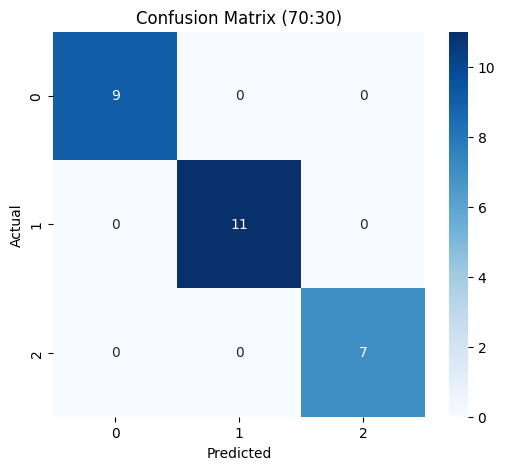

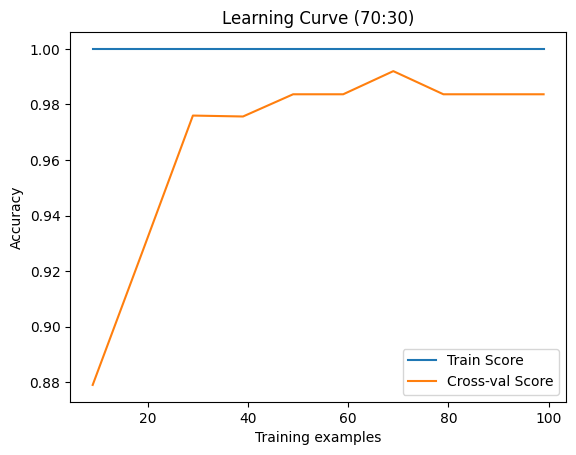

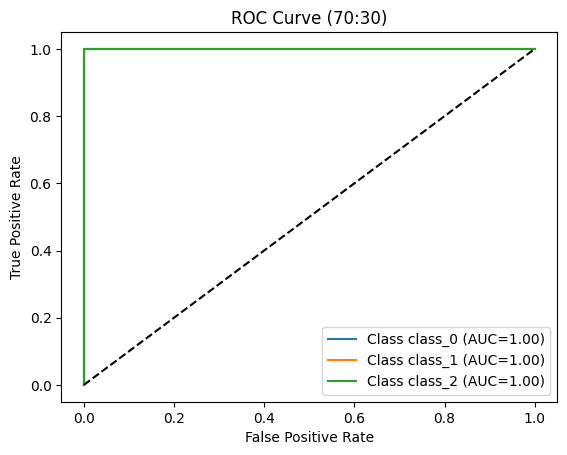

[I 2025-08-25 16:08:58,885] A new study created in memory with name: no-name-d837da5b-4d2c-4dcf-b18e-dc6a2e042fb1



=== Train-Test Split: 80:20 ===


[I 2025-08-25 16:08:59,466] Trial 0 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.001182434987246282, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 1.0.
[I 2025-08-25 16:08:59,561] Trial 1 finished with value: 0.9444444444444444 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00011302101952056678, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 1.0.
[I 2025-08-25 16:08:59,845] Trial 2 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 3.3895282197233876e-05, 'learning_rate': 'constant'}. Best is trial 0 with value: 1.0.
[I 2025-08-25 16:09:00,276] Trial 3 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.0017771577991141576, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 1.0.



Best Trial:
{'hidden_layer_sizes': (100, 100), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.001182434987246282, 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00         6
     class_1       1.00      1.00      1.00         7
     class_2       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



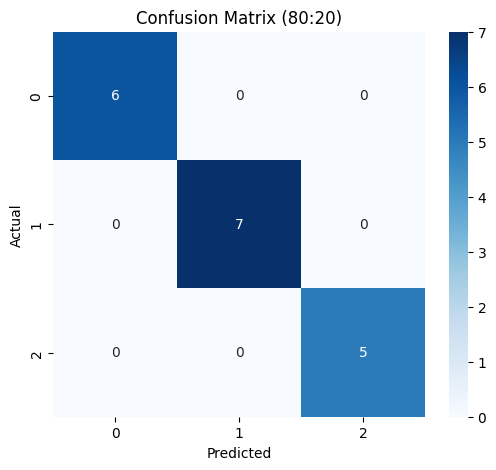

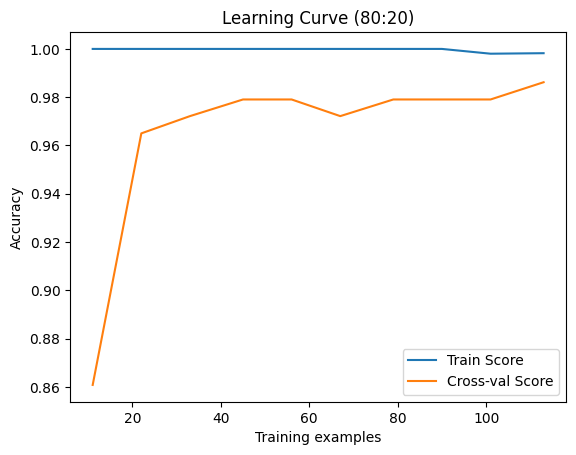

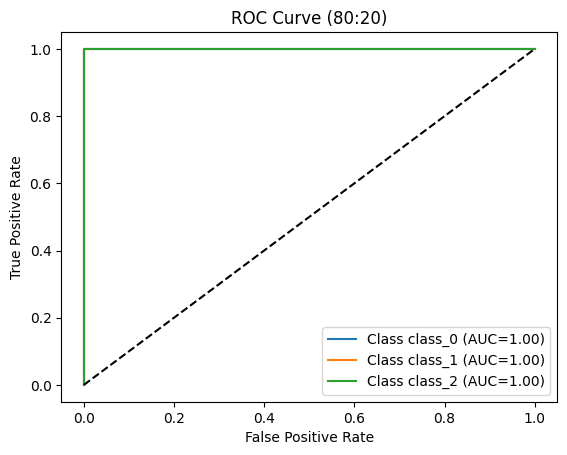

,Test Size,Accuracy,Precision,Recall,F1
0,0.5,0.955556,0.958654,0.955556,0.955051
1,0.4,0.972222,0.974359,0.972222,0.972299
2,0.3,1.000000,1.000000,1.000000,1.000000
3,0.2,1.000000,1.000000,1.000000,1.000000


In [16]:
splits = [0.5, 0.4, 0.3, 0.2]
results = []
warnings.filterwarnings("ignore", category=UserWarning, module="optuna")

for test_size in splits:
    print(f"\n=== Train-Test Split: {int((1-test_size)*100)}:{int(test_size*100)} ===")

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    def objective(trial):
        
        hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(100,), (200,), (300,), (100,100), (200,100)])
        activation = trial.suggest_categorical("activation", ["relu", "tanh", "logistic"])
        solver = trial.suggest_categorical("solver", ["adam", "sgd", "lbfgs"])
        alpha = alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
        learning_rate = trial.suggest_categorical("learning_rate", ["constant", "adaptive", "invscaling"])
    
        clf = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            learning_rate=learning_rate,
            max_iter=1000,
            random_state=42
        )
    
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
    
        return accuracy_score(y_val, y_pred)
    
    # Run Optuna search
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)  
    
    print("\nBest Trial:")
    print(study.best_trial.params)
    
    # Train best model
    best_params = study.best_trial.params
    best_clf = MLPClassifier(**best_params, max_iter=1000, random_state=42)
    best_clf.fit(X_train, y_train)

    y_pred = best_clf.predict(X_test)
    y_proba = best_clf.predict_proba(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append([test_size, acc, prec, rec, f1])

    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        best_clf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-val Score")
    plt.title(f"Learning Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy")
    plt.legend(); plt.show()

    # ROC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    for i, cls in enumerate(best_clf.classes_):
        fpr[i], tpr[i], _ = roc_curve(y_test == cls, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i, cls in enumerate(best_clf.classes_):
        plt.plot(fpr[i], tpr[i], label=f"Class {cls} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],"k--")
    plt.title(f"ROC Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(); plt.show()

results_df = pd.DataFrame(results, columns=["Test Size", "Accuracy", "Precision", "Recall", "F1"])
display(results_df)

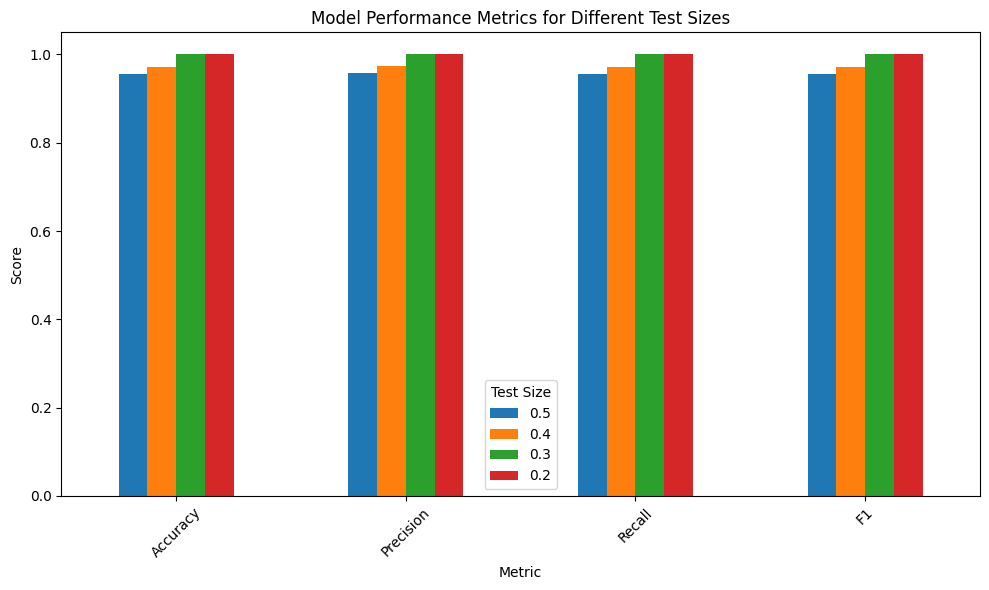

In [17]:
import matplotlib.pyplot as plt

results_df_t = results_df.drop(['Test Size'], axis=1)
results_df_t = results_df_t.T

results_df_t.plot(kind='bar', figsize=(10, 6))

plt.title('Model Performance Metrics for Different Test Sizes')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Test Size', labels=results_df['Test Size'])
plt.tight_layout()

plt.show()

In [11]:
splits = [0.5, 0.4, 0.3, 0.2]

[I 2025-08-26 06:13:44,577] A new study created in memory with name: no-name-9200707d-800f-4c66-8742-30d9c5eb7440
[I 2025-08-26 06:13:44,612] Trial 0 finished with value: 0.8863636363636364 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.00017431247833110496, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.8863636363636364.
[I 2025-08-26 06:13:44,712] Trial 1 finished with value: 0.8863636363636364 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 4.06183602988858e-05, 'learning_rate': 'constant'}. Best is trial 0 with value: 0.8863636363636364.



=== PCA with Random Forest ===

--- PCA 50:50 ---


[I 2025-08-26 06:13:44,835] Trial 2 finished with value: 0.45454545454545453 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.000753331636769225, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.8863636363636364.
[I 2025-08-26 06:13:45,317] Trial 3 finished with value: 0.8863636363636364 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 2.9513506456001533e-05, 'learning_rate': 'constant'}. Best is trial 0 with value: 0.8863636363636364.
[I 2025-08-26 06:13:45,838] Trial 4 finished with value: 0.8863636363636364 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 2.4794436301861112e-05, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.8863636363636364.
[I 2025-08-26 06:13:46,123] Trial 5 finished with value: 0.8863636363636364 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'relu', 'solver': 'adam', 'alph


Best Trial:
{'hidden_layer_sizes': (200, 100), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.009773605346000799, 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

     class_0       0.93      0.87      0.90        15
     class_1       0.89      0.89      0.89        18
     class_2       0.92      1.00      0.96        12

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.92        45
weighted avg       0.91      0.91      0.91        45



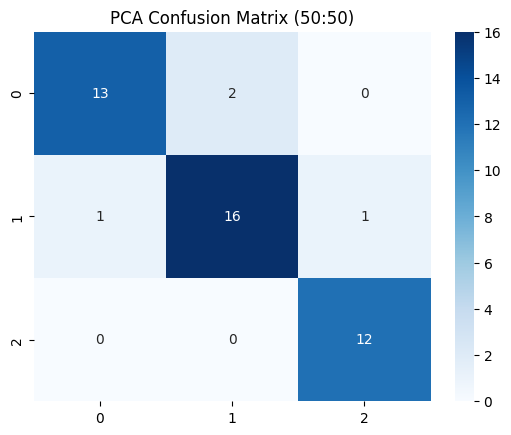

[I 2025-08-26 06:14:06,436] A new study created in memory with name: no-name-925be8ab-dc2a-4993-9d2f-af5272f66db4



--- PCA 60:40 ---


[I 2025-08-26 06:14:06,591] Trial 0 finished with value: 0.8333333333333334 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.000126649274353822, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.8333333333333334.
[I 2025-08-26 06:14:06,694] Trial 1 finished with value: 0.8611111111111112 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00020044955376132787, 'learning_rate': 'constant'}. Best is trial 1 with value: 0.8611111111111112.
[I 2025-08-26 06:14:06,779] Trial 2 finished with value: 0.3888888888888889 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.002288677777248564, 'learning_rate': 'constant'}. Best is trial 1 with value: 0.8611111111111112.
[I 2025-08-26 06:14:07,211] Trial 3 finished with value: 0.8611111111111112 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'adam', 'a


Best Trial:
{'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.00969002495734866, 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        15
     class_2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



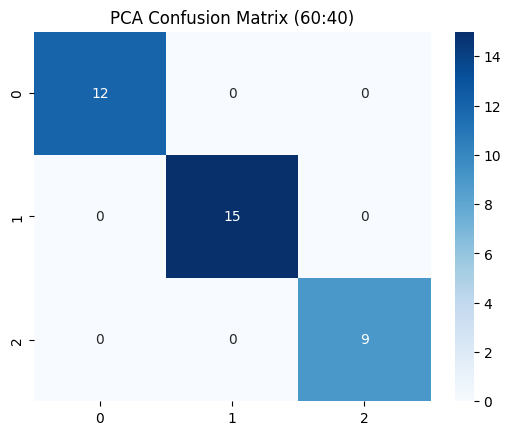

[I 2025-08-26 06:14:24,908] A new study created in memory with name: no-name-51cc27b7-b228-4255-b5fe-f37993d48bea
[I 2025-08-26 06:14:25,032] Trial 0 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001793953775059501, 'learning_rate': 'constant'}. Best is trial 0 with value: 1.0.



--- PCA 70:30 ---


[I 2025-08-26 06:14:25,386] Trial 1 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0003261041141203514, 'learning_rate': 'constant'}. Best is trial 0 with value: 1.0.
[I 2025-08-26 06:14:25,563] Trial 2 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 2.8444616299071436e-05, 'learning_rate': 'constant'}. Best is trial 0 with value: 1.0.
[I 2025-08-26 06:14:25,725] Trial 3 finished with value: 0.2962962962962963 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'sgd', 'alpha': 2.671914190659218e-05, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 1.0.
[I 2025-08-26 06:14:26,433] Trial 4 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 7.001286190538492e-05, 'learning_rate': 'adaptive'}. Best is trial 0 with value


Best Trial:
{'hidden_layer_sizes': (300,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0001793953775059501, 'learning_rate': 'constant'}
              precision    recall  f1-score   support

     class_0       0.82      1.00      0.90         9
     class_1       0.91      0.91      0.91        11
     class_2       1.00      0.71      0.83         7

    accuracy                           0.89        27
   macro avg       0.91      0.87      0.88        27
weighted avg       0.90      0.89      0.89        27



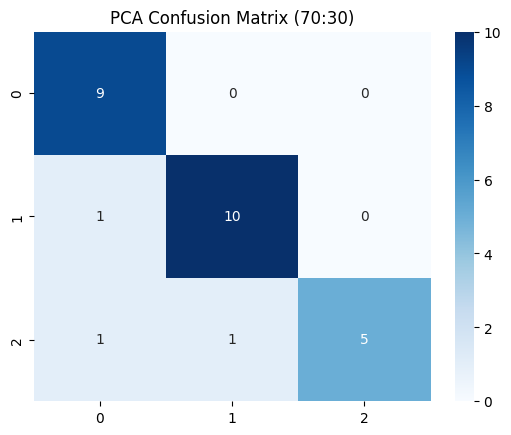

[I 2025-08-26 06:14:46,596] A new study created in memory with name: no-name-ac637da9-56e1-43cc-88ca-1f9dbc848f0b
[I 2025-08-26 06:14:46,755] Trial 0 finished with value: 0.2222222222222222 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.00032097562014571894, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.2222222222222222.



--- PCA 80:20 ---


[I 2025-08-26 06:14:46,862] Trial 1 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 2.659249203008397e-05, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 1.0.
[I 2025-08-26 06:14:47,097] Trial 2 finished with value: 0.4444444444444444 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 3.1124097828228776e-05, 'learning_rate': 'invscaling'}. Best is trial 1 with value: 1.0.
[I 2025-08-26 06:14:47,134] Trial 3 finished with value: 0.3888888888888889 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'logistic', 'solver': 'adam', 'alpha': 9.48815952878464e-05, 'learning_rate': 'invscaling'}. Best is trial 1 with value: 1.0.
[I 2025-08-26 06:14:47,188] Trial 4 finished with value: 1.0 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 3.246058038267983e-05, 'learning_rate': 'adaptive'}. Best is trial 1 wi


Best Trial:
{'hidden_layer_sizes': (300,), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 2.659249203008397e-05, 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

     class_0       0.86      1.00      0.92         6
     class_1       0.88      1.00      0.93         7
     class_2       1.00      0.60      0.75         5

    accuracy                           0.89        18
   macro avg       0.91      0.87      0.87        18
weighted avg       0.90      0.89      0.88        18



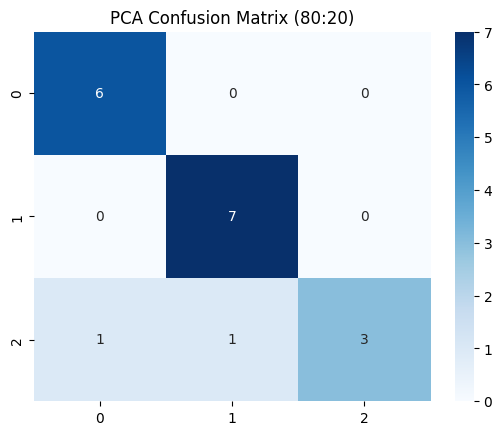

In [12]:
print("\n=== PCA with Random Forest ===")

pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X)

for test_size in splits:
    print(f"\n--- PCA {int((1-test_size)*100)}:{int(test_size*100)} ---")

    X_train, X_temp, y_train, y_temp = train_test_split(X_reduced, y, test_size=test_size, stratify=y, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    def objective(trial):
        
        hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(100,), (200,), (300,), (100,100), (200,100)])
        activation = trial.suggest_categorical("activation", ["relu", "tanh", "logistic"])
        solver = trial.suggest_categorical("solver", ["adam", "sgd", "lbfgs"])
        alpha = alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
        learning_rate = trial.suggest_categorical("learning_rate", ["constant", "adaptive", "invscaling"])
    
        clf = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            learning_rate=learning_rate,
            max_iter=1000,
            random_state=42
        )
    
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
    
        return accuracy_score(y_val, y_pred)
    
    # Run Optuna search
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)  
    
    print("\nBest Trial:")
    print(study.best_trial.params)
    
    # Train best model
    best_params = study.best_trial.params
    best_clf = MLPClassifier(**best_params, max_iter=1000, random_state=42)
    best_clf.fit(X_train, y_train)

    y_pred = best_clf.predict(X_test)

    print(classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"PCA Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.show()

# **DIGITS DATASET**

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()

In [20]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

In [22]:
classifier = MLPClassifier(hidden_layer_sizes=(1000), max_iter=1000)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("\nConfusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("------------------------------------------------------")
print("Classification Report")
print(classification_report(y_test, y_pred))


Confusion Matrix
[[51  0  0  0  1  0  1  0  0  0]
 [ 0 46  0  2  0  1  0  0  0  4]
 [ 0  0 52  1  0  0  0  0  0  0]
 [ 0  0  0 43  0  2  0  1  7  0]
 [ 1  0  0  0 53  0  0  0  0  3]
 [ 0  0  0  0  0 55  1  0  0  0]
 [ 0  1  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 53  1  0]
 [ 0  3  0  0  1  1  0  1 46  0]
 [ 0  0  0  0  0  2  0  1  1 51]]
------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.92      0.87      0.89        53
           2       1.00      0.98      0.99        53
           3       0.93      0.81      0.87        53
           4       0.96      0.93      0.95        57
           5       0.90      0.98      0.94        56
           6       0.96      0.98      0.97        54
           7       0.95      0.98      0.96        54
           8       0.84      0.88      0.86        52
           9       0.88      0.93

[I 2025-08-25 16:14:39,940] A new study created in memory with name: no-name-37a997a0-5785-4637-aa70-208bf8f4d03f



=== Train-Test Split: 50:50 ===


[I 2025-08-25 16:14:43,426] Trial 0 finished with value: 0.9643652561247216 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00026731751909045046, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.9643652561247216.
[I 2025-08-25 16:14:43,832] Trial 1 finished with value: 0.9688195991091314 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0015082506233761183, 'learning_rate': 'invscaling'}. Best is trial 1 with value: 0.9688195991091314.
[I 2025-08-25 16:14:45,420] Trial 2 finished with value: 0.9710467706013363 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'relu', 'solver': 'adam', 'alpha': 4.717276120986423e-05, 'learning_rate': 'constant'}. Best is trial 2 with value: 0.9710467706013363.
[I 2025-08-25 16:14:48,949] Trial 3 finished with value: 0.9688195991091314 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 3.


Best Trial:
{'hidden_layer_sizes': (100, 100), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00023606826559140158, 'learning_rate': 'constant'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      0.91      0.93        44
           2       0.85      1.00      0.92        39
           3       0.98      0.87      0.92        46
           4       0.92      0.98      0.95        49
           5       1.00      0.91      0.95        44
           6       0.98      0.96      0.97        56
           7       0.96      0.98      0.97        45
           8       0.95      0.89      0.92        46
           9       0.89      0.98      0.93        43

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



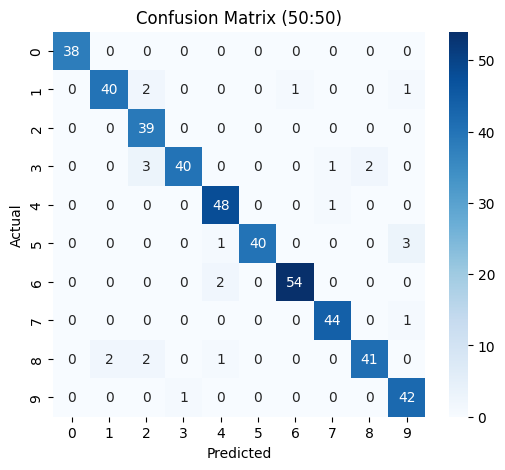

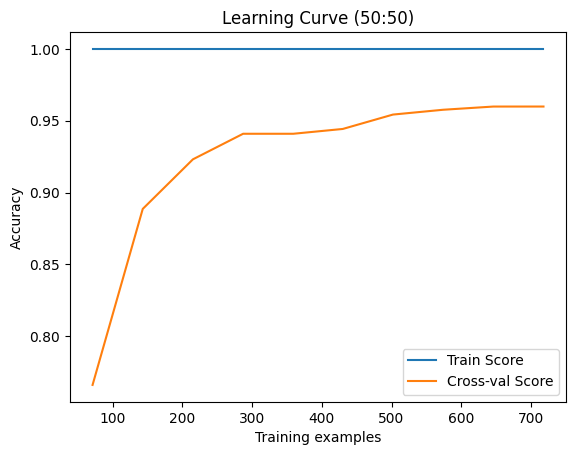

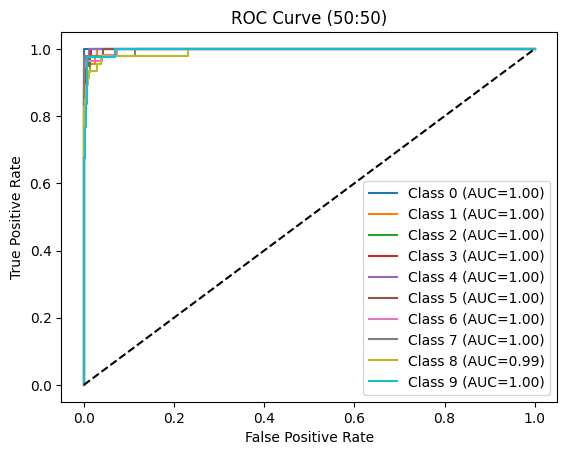

[I 2025-08-25 16:17:24,054] A new study created in memory with name: no-name-0f95d90e-cb8d-4396-bd10-1f0030872554



=== Train-Test Split: 60:40 ===


[I 2025-08-25 16:17:25,134] Trial 0 finished with value: 0.9693593314763231 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.005762187368132503, 'learning_rate': 'constant'}. Best is trial 0 with value: 0.9693593314763231.
[I 2025-08-25 16:17:25,410] Trial 1 finished with value: 0.9693593314763231 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.00019012242664448196, 'learning_rate': 'constant'}. Best is trial 0 with value: 0.9693593314763231.
[I 2025-08-25 16:17:26,194] Trial 2 finished with value: 0.9693593314763231 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.00033247518269520867, 'learning_rate': 'constant'}. Best is trial 0 with value: 0.9693593314763231.
[I 2025-08-25 16:17:27,232] Trial 3 finished with value: 0.9721448467966574 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'adam', 'alpha'


Best Trial:
{'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00017121818249033981, 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.98      1.00      0.99        42
           2       0.98      1.00      0.99        40
           3       1.00      0.94      0.97        35
           4       0.97      1.00      0.99        39
           5       0.94      0.94      0.94        32
           6       1.00      0.97      0.99        34
           7       0.97      0.97      0.97        32
           8       0.97      0.95      0.96        38
           9       0.94      0.97      0.95        30

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



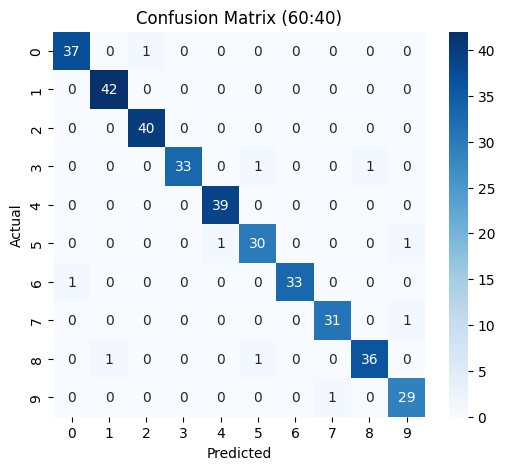

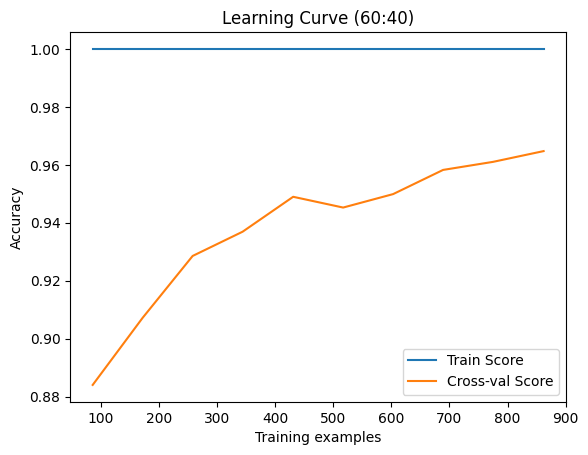

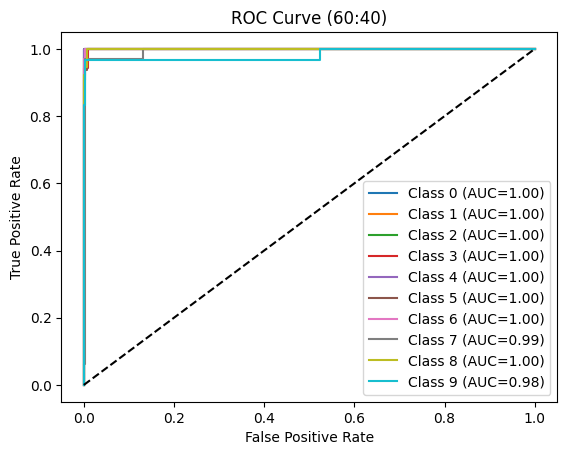

[I 2025-08-25 16:19:25,165] A new study created in memory with name: no-name-348fbe80-07f8-493f-895e-e879edab1598



=== Train-Test Split: 70:30 ===


[I 2025-08-25 16:19:26,638] Trial 0 finished with value: 0.9629629629629629 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 9.236018141732129e-05, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.9629629629629629.
[I 2025-08-25 16:19:31,209] Trial 1 finished with value: 0.9703703703703703 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0005146257796308043, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 0.9703703703703703.
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-08-25 16:19:42,336] Trial 2 finished with value: 0.8481481481481481 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 0.0006936151038867756, 'learning_rate': 'ada


Best Trial:
{'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.00307317100777546, 'learning_rate': 'adaptive'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       0.96      0.96      0.96        24
           2       0.96      1.00      0.98        27
           3       0.97      0.97      0.97        33
           4       0.97      1.00      0.98        29
           5       0.96      0.96      0.96        27
           6       1.00      0.96      0.98        23
           7       1.00      1.00      1.00        27
           8       1.00      0.96      0.98        25
           9       1.00      0.96      0.98        24

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



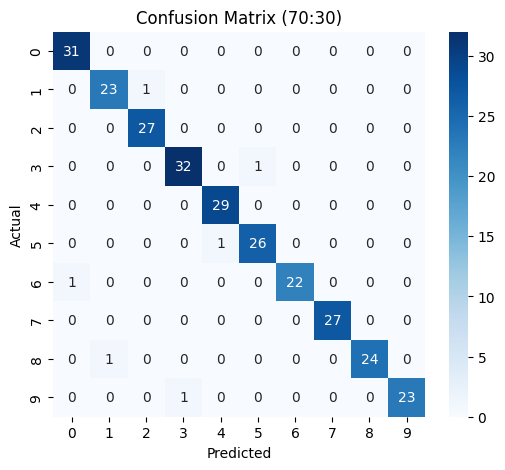

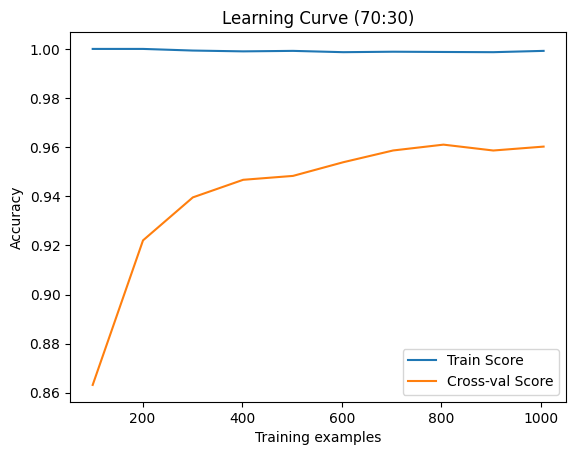

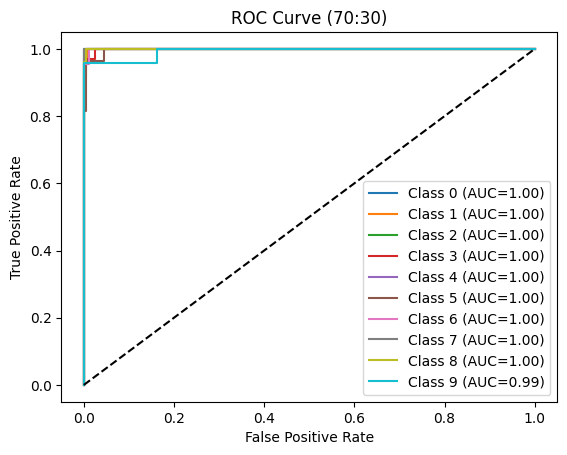

[I 2025-08-25 16:23:31,176] A new study created in memory with name: no-name-3c3e270a-4023-439d-87ee-c9314cd74873



=== Train-Test Split: 80:20 ===


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-08-25 16:23:37,479] Trial 0 finished with value: 0.2833333333333333 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 2.3951652672949874e-05, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.2833333333333333.
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-08-25 16:23:45,152] Trial 1 finished with value: 0.9388888888888889 and parameters: {'hidden_layer_sizes': (100,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 1.0744301718423614e-05, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 0.938888


Best Trial:
{'hidden_layer_sizes': (100, 100), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0008327393854627103, 'learning_rate': 'invscaling'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        23
           5       0.95      0.90      0.92        20
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        24
           8       1.00      0.94      0.97        17
           9       0.94      1.00      0.97        17

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



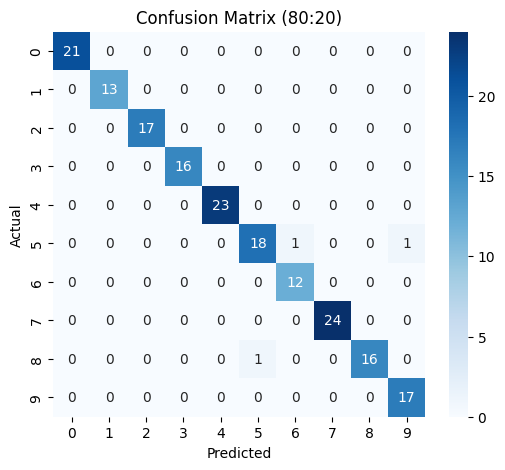

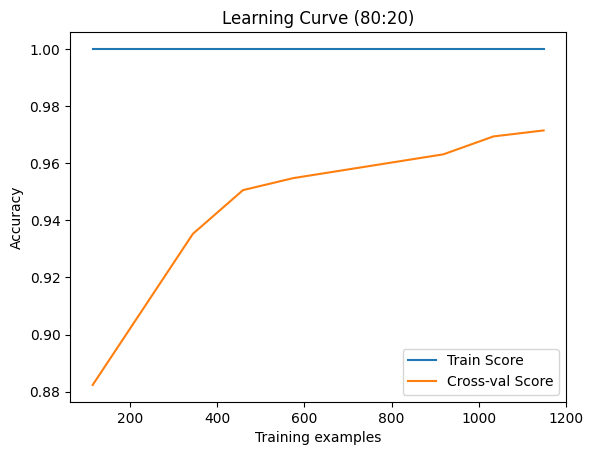

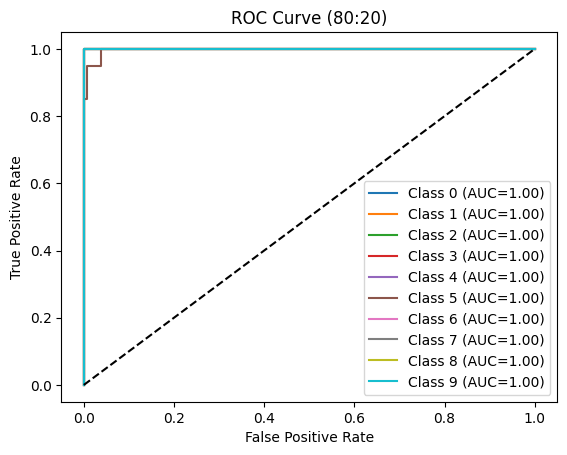

,Test Size,Accuracy,Precision,Recall,F1
0,0.5,0.946667,0.949756,0.946667,0.946699
1,0.4,0.972222,0.972528,0.972222,0.972184
2,0.3,0.977778,0.978149,0.977778,0.977754
3,0.2,0.983333,0.983777,0.983333,0.983226


In [24]:
splits = [0.5, 0.4, 0.3, 0.2]
results = []
warnings.filterwarnings("ignore", category=UserWarning, module="optuna")

for test_size in splits:
    print(f"\n=== Train-Test Split: {int((1-test_size)*100)}:{int(test_size*100)} ===")

    X_train, X_temp, y_train, y_temp = train_test_split(data, digits.target, test_size=test_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    def objective(trial):
        
        hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(100,), (200,), (300,), (100,100), (200,100)])
        activation = trial.suggest_categorical("activation", ["relu", "tanh", "logistic"])
        solver = trial.suggest_categorical("solver", ["adam", "sgd", "lbfgs"])
        alpha = alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
        learning_rate = trial.suggest_categorical("learning_rate", ["constant", "adaptive", "invscaling"])
    
        clf = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            learning_rate=learning_rate,
            max_iter=1000,
            random_state=42
        )
    
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
    
        return accuracy_score(y_val, y_pred)
    
    # Run Optuna search
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)  
    
    print("\nBest Trial:")
    print(study.best_trial.params)
    
    # Train best model
    best_params = study.best_trial.params
    best_clf = MLPClassifier(**best_params, max_iter=1000, random_state=42)
    best_clf.fit(X_train, y_train)

    y_pred = best_clf.predict(X_test)
    y_proba = best_clf.predict_proba(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append([test_size, acc, prec, rec, f1])

    print(classification_report(y_test, y_pred))

    # Confusion Matrix Heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        best_clf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train Score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Cross-val Score")
    plt.title(f"Learning Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("Training examples"); plt.ylabel("Accuracy")
    plt.legend(); plt.show()

    # ROC Curve
    fpr, tpr, roc_auc = {}, {}, {}
    for i, cls in enumerate(best_clf.classes_):
        fpr[i], tpr[i], _ = roc_curve(y_test == cls, y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i, cls in enumerate(best_clf.classes_):
        plt.plot(fpr[i], tpr[i], label=f"Class {cls} (AUC={roc_auc[i]:.2f})")
    plt.plot([0,1],[0,1],"k--")
    plt.title(f"ROC Curve ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(); plt.show()

results_df = pd.DataFrame(results, columns=["Test Size", "Accuracy", "Precision", "Recall", "F1"])
display(results_df)

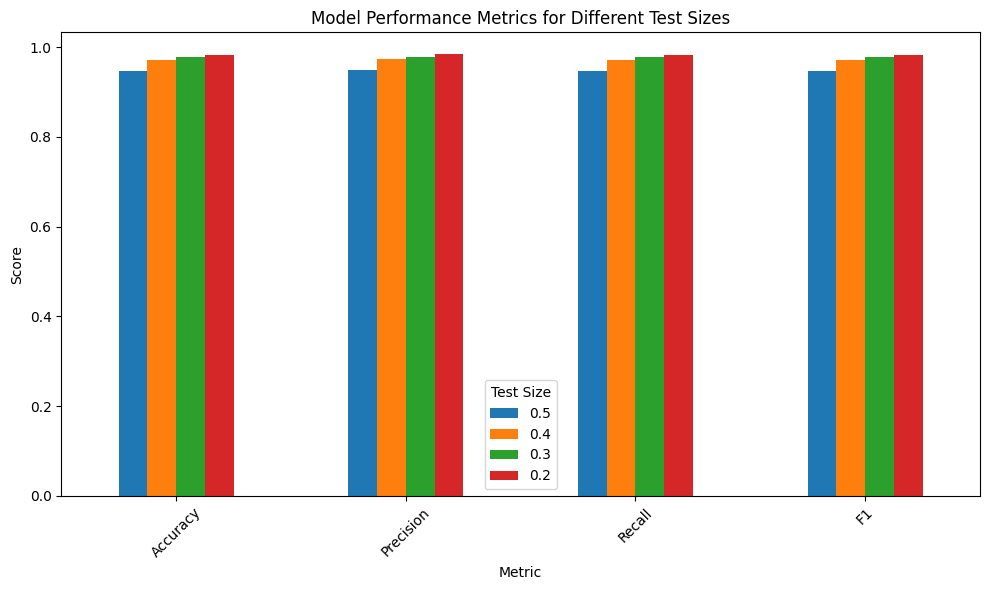

In [25]:
import matplotlib.pyplot as plt

results_df_t = results_df.drop(['Test Size'], axis=1)
results_df_t = results_df_t.T

results_df_t.plot(kind='bar', figsize=(10, 6))

plt.title('Model Performance Metrics for Different Test Sizes')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Test Size', labels=results_df['Test Size'])
plt.tight_layout()

plt.show()

[I 2025-08-25 16:29:10,489] A new study created in memory with name: no-name-5b8648e7-bb6d-4d18-8c17-2611d64fd422



=== PCA with Random Forest ===

--- PCA 50:50 ---


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-08-25 16:29:17,438] Trial 0 finished with value: 0.9242761692650334 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'relu', 'solver': 'sgd', 'alpha': 0.0072374727175940935, 'learning_rate': 'constant'}. Best is trial 0 with value: 0.9242761692650334.
[I 2025-08-25 16:29:18,171] Trial 1 finished with value: 0.933184855233853 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.0005200488631103209, 'learning_rate': 'constant'}. Best is trial 1 with value: 0.933184855233853.
[I 2025-08-25 16:29:19,222] Trial 2 finished with value: 0.9376391982182628 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.001071659485275243, 'learning_rate': 'invsc


Best Trial:
{'hidden_layer_sizes': (300,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.0008662529486526708, 'learning_rate': 'constant'}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       0.91      0.95      0.93        44
           2       1.00      0.97      0.99        39
           3       0.98      0.89      0.93        46
           4       0.98      0.98      0.98        49
           5       0.95      0.93      0.94        44
           6       1.00      0.96      0.98        56
           7       0.96      1.00      0.98        45
           8       0.89      0.85      0.87        46
           9       0.89      0.98      0.93        43

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



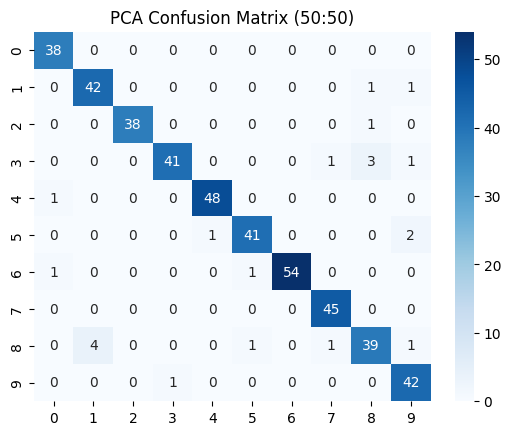

[I 2025-08-25 16:31:38,779] A new study created in memory with name: no-name-d3fbc350-5191-4739-923e-951a429a3e8e



--- PCA 60:40 ---


[I 2025-08-25 16:31:39,410] Trial 0 finished with value: 0.9415041782729805 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.0008225860320520445, 'learning_rate': 'constant'}. Best is trial 0 with value: 0.9415041782729805.
[I 2025-08-25 16:31:42,035] Trial 1 finished with value: 0.9554317548746518 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'tanh', 'solver': 'adam', 'alpha': 9.346166464792072e-05, 'learning_rate': 'invscaling'}. Best is trial 1 with value: 0.9554317548746518.
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-08-25 16:31:53,966] Trial 2 finished with value: 0.6713091922005571 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 1.2383245118360662e-05, 'learning_rate


Best Trial:
{'hidden_layer_sizes': (200, 100), 'activation': 'logistic', 'solver': 'adam', 'alpha': 0.00322940924384243, 'learning_rate': 'invscaling'}
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.93      0.98      0.95        42
           2       0.98      1.00      0.99        40
           3       0.92      0.94      0.93        35
           4       0.97      0.97      0.97        39
           5       0.94      0.94      0.94        32
           6       1.00      0.97      0.99        34
           7       1.00      0.97      0.98        32
           8       0.94      0.82      0.87        38
           9       0.94      1.00      0.97        30

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



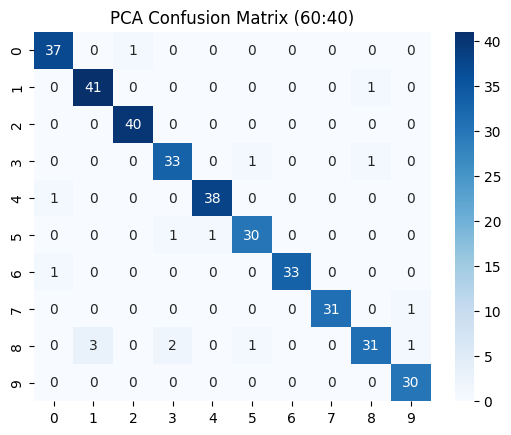

[I 2025-08-25 16:34:39,085] A new study created in memory with name: no-name-fa29efa8-5db6-469a-a540-a96127b8aa63



--- PCA 70:30 ---


[I 2025-08-25 16:34:46,361] Trial 0 finished with value: 0.9592592592592593 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'tanh', 'solver': 'sgd', 'alpha': 0.0004713601054408296, 'learning_rate': 'constant'}. Best is trial 0 with value: 0.9592592592592593.
[I 2025-08-25 16:34:46,774] Trial 1 finished with value: 0.05925925925925926 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'logistic', 'solver': 'sgd', 'alpha': 2.5477609455019228e-05, 'learning_rate': 'invscaling'}. Best is trial 0 with value: 0.9592592592592593.
[I 2025-08-25 16:34:47,500] Trial 2 finished with value: 0.9592592592592593 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'tanh', 'solver': 'lbfgs', 'alpha': 0.0007719389852125682, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.9592592592592593.
[I 2025-08-25 16:34:56,909] Trial 3 finished with value: 0.9555555555555556 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'sgd', 


Best Trial:
{'hidden_layer_sizes': (200, 100), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0018002273106343608, 'learning_rate': 'constant'}
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.92      1.00      0.96        24
           2       0.96      1.00      0.98        27
           3       0.97      0.97      0.97        33
           4       0.97      1.00      0.98        29
           5       0.93      0.96      0.95        27
           6       1.00      0.96      0.98        23
           7       1.00      1.00      1.00        27
           8       1.00      0.92      0.96        25
           9       1.00      0.96      0.98        24

    accuracy                           0.97       270
   macro avg       0.98      0.97      0.97       270
weighted avg       0.98      0.97      0.97       270



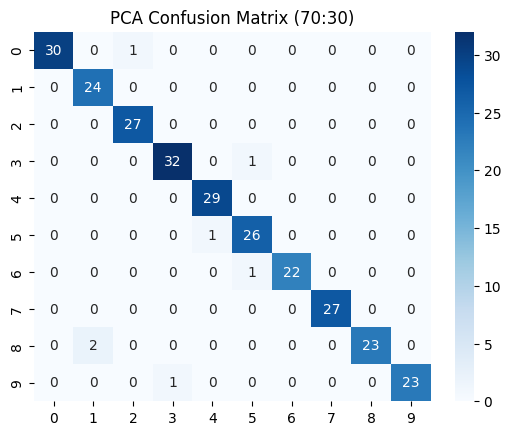

[I 2025-08-25 16:37:45,202] A new study created in memory with name: no-name-c288a90c-fcc2-4c60-9c3e-75779912dbb8



--- PCA 80:20 ---


[I 2025-08-25 16:37:46,231] Trial 0 finished with value: 0.9611111111111111 and parameters: {'hidden_layer_sizes': (300,), 'activation': 'logistic', 'solver': 'lbfgs', 'alpha': 0.00036334213000336875, 'learning_rate': 'adaptive'}. Best is trial 0 with value: 0.9611111111111111.
[I 2025-08-25 16:37:48,482] Trial 1 finished with value: 0.9777777777777777 and parameters: {'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.004139348016905163, 'learning_rate': 'invscaling'}. Best is trial 1 with value: 0.9777777777777777.
[I 2025-08-25 16:37:49,665] Trial 2 finished with value: 0.9611111111111111 and parameters: {'hidden_layer_sizes': (200, 100), 'activation': 'relu', 'solver': 'lbfgs', 'alpha': 5.655112531913181e-05, 'learning_rate': 'adaptive'}. Best is trial 1 with value: 0.9777777777777777.
[I 2025-08-25 16:37:49,939] Trial 3 finished with value: 0.9611111111111111 and parameters: {'hidden_layer_sizes': (200,), 'activation': 'tanh', 'solver': 'lbfgs', '


Best Trial:
{'hidden_layer_sizes': (100, 100), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.004139348016905163, 'learning_rate': 'invscaling'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      0.92      0.96        13
           2       0.94      1.00      0.97        17
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        23
           5       0.95      0.90      0.92        20
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00        24
           8       0.88      0.88      0.88        17
           9       1.00      1.00      1.00        17

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



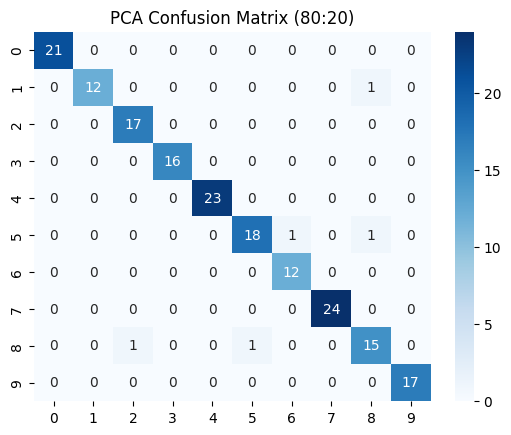

In [26]:
print("\n=== PCA with Random Forest ===")

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(data)

for test_size in splits:
    print(f"\n--- PCA {int((1-test_size)*100)}:{int(test_size*100)} ---")

    X_train, X_temp, y_train, y_temp = train_test_split(X_reduced, digits.target, test_size=test_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    def objective(trial):
        
        hidden_layer_sizes = trial.suggest_categorical("hidden_layer_sizes", [(100,), (200,), (300,), (100,100), (200,100)])
        activation = trial.suggest_categorical("activation", ["relu", "tanh", "logistic"])
        solver = trial.suggest_categorical("solver", ["adam", "sgd", "lbfgs"])
        alpha = alpha = trial.suggest_float("alpha", 1e-5, 1e-2, log=True)
        learning_rate = trial.suggest_categorical("learning_rate", ["constant", "adaptive", "invscaling"])
    
        clf = MLPClassifier(
            hidden_layer_sizes=hidden_layer_sizes,
            activation=activation,
            solver=solver,
            alpha=alpha,
            learning_rate=learning_rate,
            max_iter=1000,
            random_state=42
        )
    
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
    
        return accuracy_score(y_val, y_pred)
    
    # Run Optuna search
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)  
    
    print("\nBest Trial:")
    print(study.best_trial.params)
    
    # Train best model
    best_params = study.best_trial.params
    best_clf = MLPClassifier(**best_params, max_iter=1000, random_state=42)
    best_clf.fit(X_train, y_train)

    y_pred = best_clf.predict(X_test)

    print(classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"PCA Confusion Matrix ({int((1-test_size)*100)}:{int(test_size*100)})")
    plt.show()